# Polynomial Regression

## Objectives

- Model non-linear relationships between variables using polynomial regression.
- Evaluate model performance through different polynomial degrees.
- Assess model fit using R² and RMSE metrics.

## Background

This notebook delves into polynomial regression to model complex, non-linear relationships in data, extending beyond simple linear approaches by incorporating higher-degree terms. It also rigorously assesses these models' assumptions and fit, facilitating a deeper understanding of their predictive accuracy and limitations.

## Datasets used

Simulated Data: The dataset is synthetically generated to demonstrate non-linear patterns.

## Introduction

Variables often exhibit non-linear relationships that cannot fit well with a straight line. 

In these cases, we can use linear regression to fit the data's curved line by adding additional higher-order terms (squared, cubic, etc.) to the model. 

A linear regression that involves higher-order terms is known as "polynomial regression."

In [1]:
import numpy as np 
np.random.seed(50) 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model    import LinearRegression
from sklearn.preprocessing   import PolynomialFeatures
from sklearn.metrics         import root_mean_squared_error, mean_squared_error, r2_score

from statsmodels.graphics.gofplots import qqplot

A polynomial regression is:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + ... + a_n x^n
$$
Notice that this is still a *linear model* — the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.

## Generating data

In [3]:
# Generating some data
x = np.random.uniform(0, 10, size=100)
r = np.random.normal(0, 1, size=100)
y = np.sin(x) * x + r 

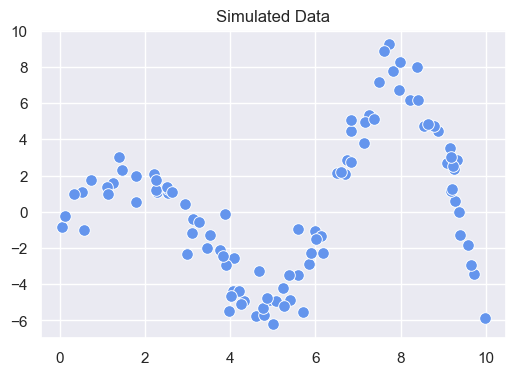

In [4]:
# Scatterplot
sns.set_theme(rc={"figure.figsize": (6, 4)})         # width=6, height=4
sns.scatterplot(x=x, y=y, s=70, color='cornflowerblue').set_title("Simulated Data"); 

In [5]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20) 
print(f'Train Set: {x_train.shape[0]} cases, \tTest Set: {x_test.shape[0]} cases') 

Train Set: 70 cases, 	Test Set: 30 cases


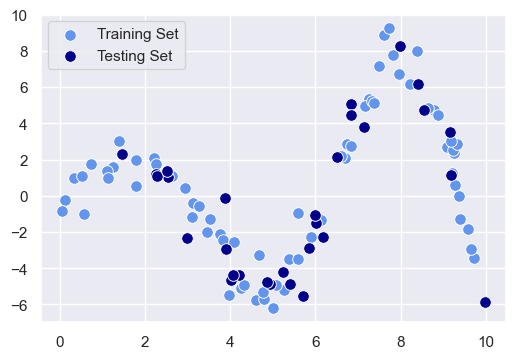

In [6]:
# Graphing the training and test sets
sns.scatterplot(x=x_train, y=y_train, s=70, color='cornflowerblue', label='Training Set')
sns.scatterplot(x=x_test, y=y_test,   s=70, color='darkblue',       label='Testing Set');   

In [7]:
# Saving training data
data_train = pd.DataFrame({'x': x_train, 'y': y_train})
data_train.head()

,x,y
0,2.220394,2.084310
1,9.580710,-1.814024
2,2.269616,1.739214
3,1.389601,3.001856
4,7.257503,5.363646


In [9]:
# Saving testing data
data_test = pd.DataFrame({'x': x_test, 'y': y_test})
data_test.head()

,x,y
0,6.826326,5.047822
1,7.977601,8.248162
2,2.554739,1.051740
3,9.178782,1.135198
4,2.271142,1.210677


## Quadratic Model

In [10]:
# Setting the quadratic data (degree 2)
d2 = PolynomialFeatures(degree=2, include_bias=False) 

In [11]:
# Creating the quadratic data (x and x**2)
d2_X = d2.fit_transform(np.array(x_train).reshape(-1, 1))

In [12]:
# Fitting the model with the quadratic data
d2_model = LinearRegression().fit(d2_X, y_train) 

In [14]:
# Check trained model coefficients and y-intercept
print(f"Model intercept = {d2_model.intercept_:.2f}")
print(f"Model Coefficients =", d2_model.coef_)

Model intercept = 0.82
Model Coefficients = [-0.93634444  0.12940783]


In [15]:
print(f"Quadratic Model: y = {d2_model.coef_[1]:.2f}x² + {d2_model.coef_[0]:.2f}x + {d2_model.intercept_:.2f}")

Quadratic Model: y = 0.13x² + -0.94x + 0.82


In [16]:
# Prediction with training cases
data_train['y_pred2'] = d2_model.predict(d2_X)
data_train['res2']    = data_train.y - data_train.y_pred2
data_train.head()

,x,y,y_pred2,res2
0,2.220394,2.084310,-0.620542,2.704852
1,9.580710,-1.814024,3.728012,-5.542036
2,2.269616,1.739214,-0.638031,2.377245
3,1.389601,3.001856,-0.230748,3.232605
4,7.257503,5.363646,0.841073,4.522572


In [17]:
# Prediction on unseen cases
d2_x_test = d2.fit_transform(np.array(x_test).reshape(-1, 1))
data_test['y_pred2'] = d2_model.predict(d2_x_test)
data_test['res2'] = data_test.y - data_test.y_pred2
data_test.head()

,x,y,y_pred2,res2
0,6.826326,5.047822,0.458959,4.588863
1,7.977601,8.248162,1.586517,6.661645
2,2.554739,1.051740,-0.727000,1.778739
3,9.178782,1.135198,3.128624,-1.993427
4,2.271142,1.210677,-0.638563,1.849240


### Computing R²

In [18]:
# Computing R²
d2_r2_train = r2_score(data_train.y, data_train.y_pred2)
d2_r2_test  = r2_score(data_test.y,  data_test.y_pred2)
print(f'Training Set: R² = {d2_r2_train:.3f}')
print(f'Testing  Set: R² = {d2_r2_test:.3f}')

Training Set: R² = 0.161
Testing  Set: R² = 0.121


### Q-Q Plots

The Q-Q plot is a graphical tool to determine whether a set of data came from a theoretical distribution. In this case, we use Q-Q plots to show whether the residuals fit a normal distribution.

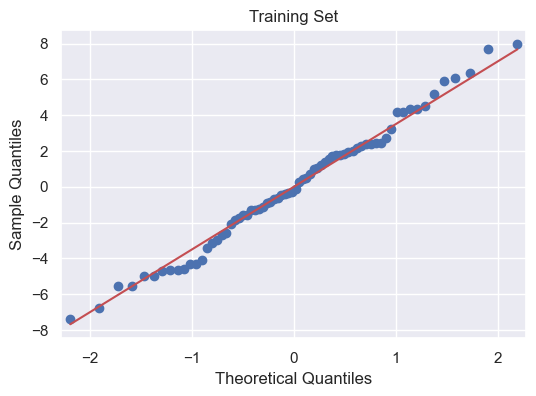

In [19]:
qqplot(data_train.res2, line='s')
plt.title('Training Set');

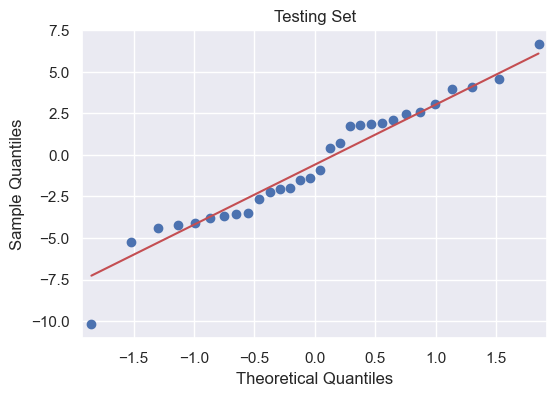

In [20]:
qqplot(data_test.res2, line='s')
plt.title('Testing Set');

When residuals are normally distributed, they lie along the straight line on the Q-Q plot. As you can see, that is not happening!

### Plotting the model

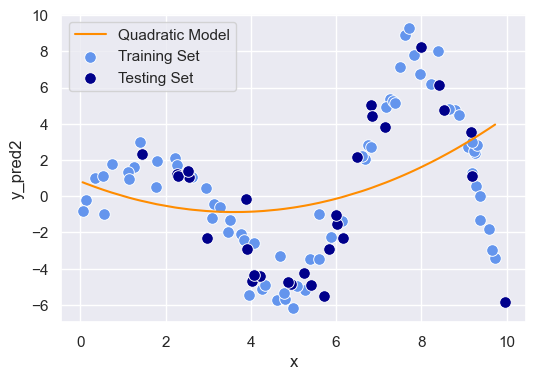

In [22]:
# Plotting the quadratic model
sns.lineplot(x=data_train.x,  y=data_train.y_pred2, color='darkorange', label='Quadratic Model')
sns.scatterplot(x=x_train, y=y_train, s=70, color='cornflowerblue', label='Training Set')
sns.scatterplot(x=x_test,  y=y_test,  s=70, color='darkblue',       label='Testing Set');

## Cubic Model

The quadratic model does not fit the data. Let's try the cubic one!

In [23]:
# Creating the cubic data (x, x**2 and x**3)
d3 = PolynomialFeatures(degree=3, include_bias=False) 
d3_X = d3.fit_transform(np.array(x_train).reshape(-1, 1))

In [24]:
# Fitting the model with the cubic data
d3_model = LinearRegression().fit(d3_X, y_train) 

In [25]:
print(f"Cubic Model: y = {d3_model.coef_[2]:.2f}x³ + {d3_model.coef_[1]:.2f}x² + "
      f"{d3_model.coef_[0]:.2f}x + {d3_model.intercept_:.2f}")

Cubic Model: y = -0.09x³ + 1.45x² + -6.11x + 4.87


In [26]:
# Prediction with training cases
data_train['y_pred3'] = d3_model.predict(d3_X)
data_train['res3'] = data_train.y - data_train.y_pred3
data_train.head()

,x,y,y_pred2,res2,y_pred3,res3
0,2.220394,2.084310,-0.620542,2.704852,-2.528437,4.612747
1,9.580710,-1.814024,3.728012,-5.542036,1.431911,-3.245935
2,2.269616,1.739214,-0.638031,2.377245,-2.575171,4.314385
3,1.389601,3.001856,-0.230748,3.232605,-1.061529,4.063385
4,7.257503,5.363646,0.841073,4.522572,2.960612,2.403033


In [27]:
# Prediction on unseen cases
d3_X_test = d3.fit_transform(np.array(x_test).reshape(-1,1))
data_test['y_pred3'] = d3_model.predict(d3_X_test)
data_test['res3'] = data_test.y - data_test.y_pred3
data_test.head()

,x,y,y_pred2,res2,y_pred3,res3
0,6.826326,5.047822,0.458959,4.588863,2.478785,2.569037
1,7.977601,8.248162,1.586517,6.661645,3.348387,4.899775
2,2.554739,1.051740,-0.727000,1.778739,-2.767275,3.819014
3,9.178782,1.135198,3.128624,-1.993427,2.354740,-1.219542
4,2.271142,1.210677,-0.638563,1.849240,-2.576553,3.787231


### Computing R²

In [28]:
# Computing R²
d3_r2_train = r2_score(data_train.y, data_train.y_pred3)
d3_r2_test  = r2_score(data_test.y,  data_test.y_pred3)
print(f"Training Set: R² = {d3_r2_train:.3f}")
print(f"Testing  Set: R² = {d3_r2_test:.3f}")

Training Set: R² = 0.339
Testing  Set: R² = 0.260


### Q-Q Plots

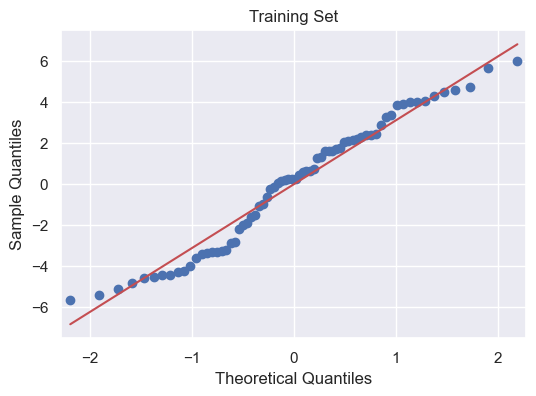

In [29]:
qqplot(data_train.res3, line='s')
plt.title('Training Set');

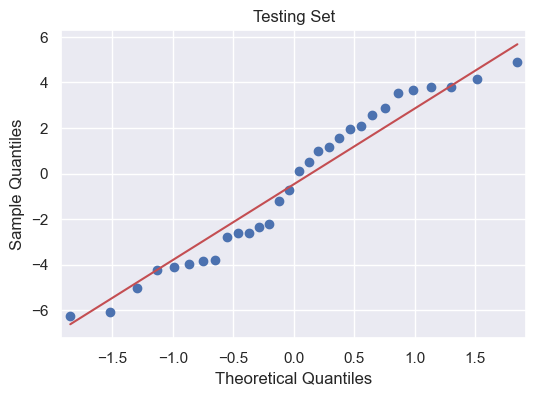

In [30]:
qqplot(data_test.res3, line='s')
plt.title('Testing Set');

The Q-Q plot does not show normally distributed residuals.

### Ploting the model

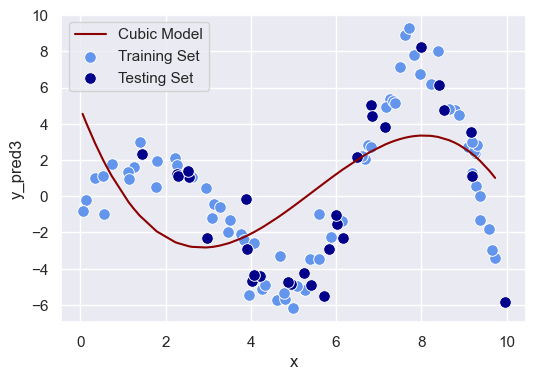

In [31]:
# Plotting the cubic model
sns.lineplot(x=data_train.x,  y=data_train.y_pred3, color='darkred', label='Cubic Model')
sns.scatterplot(x=x_train, y=y_train, s=70, color='cornflowerblue', label='Training Set')
sns.scatterplot(x=x_test,  y=y_test,  s=70, color='darkblue',       label='Testing Set');

Let's try a polynomial model with a higher degree.

## Degree 5 Polynomial Model

In [32]:
# Creating the 5 degree polynomial data 
d5 = PolynomialFeatures(degree=5, include_bias=False) 
d5_X = d5.fit_transform(np.array(x_train).reshape(-1,1))

In [33]:
# Fitting the model with the data
d5_model = LinearRegression().fit(d5_X, y_train) 

In [34]:
print(f"Model: y = {d5_model.coef_[4]:.2f}x⁵ + {d5_model.coef_[3]:.2f}x⁴ + "
      f"{d5_model.coef_[2]:.2f}x³ + {d5_model.coef_[1]:.2f}x² + "
      f"{d5_model.coef_[0]:.2f}x + {d5_model.intercept_:.2f}")

Model: y = -0.00x⁵ + 0.03x⁴ + 0.40x³ + -3.89x² + 7.96x + -2.16


In [35]:
# Prediction with training cases
data_train['y_pred5'] = d5_model.predict(d5_X)
data_train['res5'] = data_train.y - data_train.y_pred5
data_train.head()

,x,y,y_pred2,res2,y_pred3,res3,y_pred5,res5
0,2.220394,2.084310,-0.620542,2.704852,-2.528437,4.612747,1.203718,0.880592
1,9.580710,-1.814024,3.728012,-5.542036,1.431911,-3.245935,-2.863958,1.049934
2,2.269616,1.739214,-0.638031,2.377245,-2.575171,4.314385,1.073043,0.666171
3,1.389601,3.001856,-0.230748,3.232605,-1.061529,4.063385,2.549293,0.452563
4,7.257503,5.363646,0.841073,4.522572,2.960612,2.403033,4.706486,0.657159


In [36]:
# Prediction on unseen cases
d5_X_test = d5.fit_transform(np.array(x_test).reshape(-1,1))
data_test['y_pred5'] = d5_model.predict(d5_X_test)
data_test['res5'] = data_test.y - data_test.y_pred5
data_test.head()

,x,y,y_pred2,res2,y_pred3,res3,y_pred5,res5
0,6.826326,5.047822,0.458959,4.588863,2.478785,2.569037,2.592222,2.455600
1,7.977601,8.248162,1.586517,6.661645,3.348387,4.899775,7.253767,0.994395
2,2.554739,1.051740,-0.727000,1.778739,-2.767275,3.819014,0.255626,0.796114
3,9.178782,1.135198,3.128624,-1.993427,2.354740,-1.219542,3.025618,-1.890420
4,2.271142,1.210677,-0.638563,1.849240,-2.576553,3.787231,1.068935,0.141742


### Computing R²

In [37]:
# Computing R²
d5_r2_train = r2_score(data_train.y, data_train.y_pred5)
d5_r2_test  = r2_score(data_test.y,  data_test.y_pred5)
print(f'Training Set: R² = {d5_r2_train:.3f}')
print(f'Testing  Set: R² = {d5_r2_test:.3f}')

Training Set: R² = 0.899
Testing  Set: R² = 0.798


### Q-Q Plots

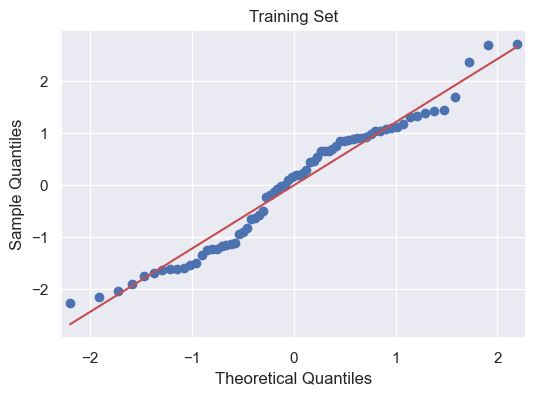

In [38]:
qqplot(data_train.res5, line='s')
plt.title('Training Set');

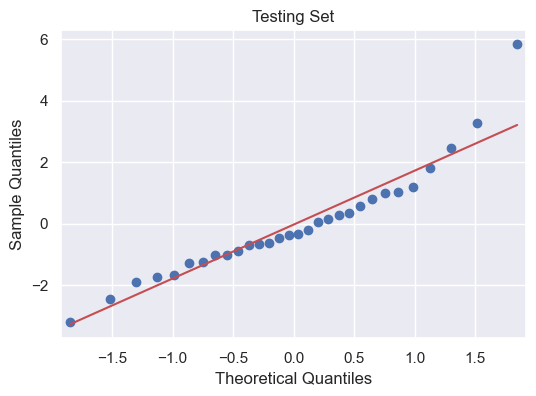

In [39]:
qqplot(data_test.res5, line='s')
plt.title('Testing Set');

### Ploting the model

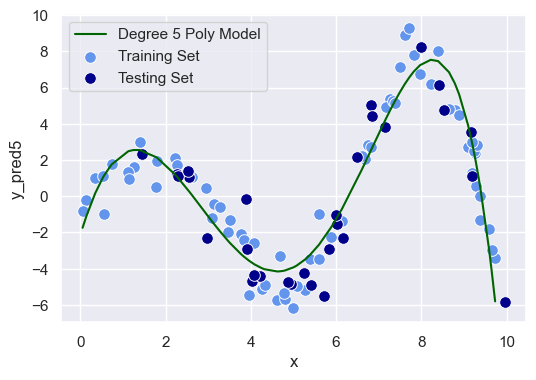

In [40]:
# Plotting the model
sns.lineplot(x=data_train.x, y=data_train.y_pred5, color='darkgreen',      label='Degree 5 Poly Model')
sns.scatterplot(x=x_train,   y=y_train, s=70,      color='cornflowerblue', label='Training Set')
sns.scatterplot(x=x_test,    y=y_test,  s=70,      color='darkblue',       label='Testing Set');

## Comparing the models

### Computing RMSE

`RMSE` is a square root of the mean square error. It helps us plot the difference between a model parameter's estimate and actual value.
Using RSME, we can measure the efficiency of the model. 

The lower the `RMSE`, the better a model fits a dataset!

In [41]:
d2_rmse_train = root_mean_squared_error(data_train.y, data_train.y_pred2)
d3_rmse_train = root_mean_squared_error(data_train.y, data_train.y_pred3)
d5_rmse_train = root_mean_squared_error(data_train.y, data_train.y_pred5)

In [42]:
# Computing RMSE with the training set
print('Training Set - RMSE')
print(f'Quadratic Model - RMSE = {d2_rmse_train:.2f}')
print(f'Cubic     Model - RMSE = {d3_rmse_train:.2f}')
print(f'Deg 5 Pol Model - RMSE = {d5_rmse_train:.2f}')     

Training Set - RMSE
Quadratic Model - RMSE = 3.50
Cubic     Model - RMSE = 3.11
Deg 5 Pol Model - RMSE = 1.22


In [43]:
d2_rmse_test = root_mean_squared_error(data_test.y, data_test.y_pred2)
d3_rmse_test = root_mean_squared_error(data_test.y, data_test.y_pred3)
d5_rmse_test = root_mean_squared_error(data_test.y, data_test.y_pred5)

In [44]:
# Computing RMSE with the testing set
print('Testing Set - RMSE')
print(f'Quadratic Model - RMSE = {d2_rmse_test:.2f}')
print(f'Cubic     Model - RMSE = {d3_rmse_test:.2f}')
print(f'Deg 5 Pol Model - RMSE = {d5_rmse_test:.2f}')

Testing Set - RMSE
Quadratic Model - RMSE = 3.66
Cubic     Model - RMSE = 3.36
Deg 5 Pol Model - RMSE = 1.75


The degree 5 polynomial model shows the better fit to the data.

### Plotting all models together

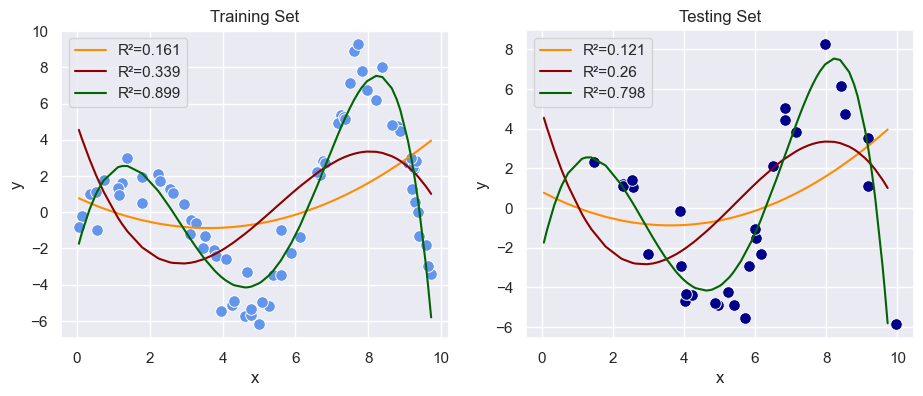

In [45]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
sns.lineplot(x=data_train.x, y=data_train.y_pred2, color='darkorange', 
             label='R²='+str(np.round(d2_r2_train,3)))
sns.lineplot(x=data_train.x, y=data_train.y_pred3, color='darkred', 
             label='R²='+str(np.round(d3_r2_train,3)))
sns.lineplot(x=data_train.x, y=data_train.y_pred5, color='darkgreen', 
             label='R²='+str(np.round(d5_r2_train,3))).set_ylabel('y')
sns.scatterplot(x=x_train, y=y_train, s=70, color='cornflowerblue').set_title('Training Set');

plt.subplot(122)
sns.lineplot(x=data_train.x, y=data_train.y_pred2, color='darkorange', 
             label='R²='+str(np.round(d2_r2_test,3)))
sns.lineplot(x=data_train.x, y=data_train.y_pred3, color='darkred', 
             label='R²='+str(np.round(d3_r2_test,3)))
sns.lineplot(x=data_train.x, y=data_train.y_pred5, color='darkgreen', 
             label='R²='+str(np.round(d5_r2_test,3))).set_ylabel('y')
sns.scatterplot(x=x_test, y=y_test, s=70, color='darkblue').set_title('Testing Set');


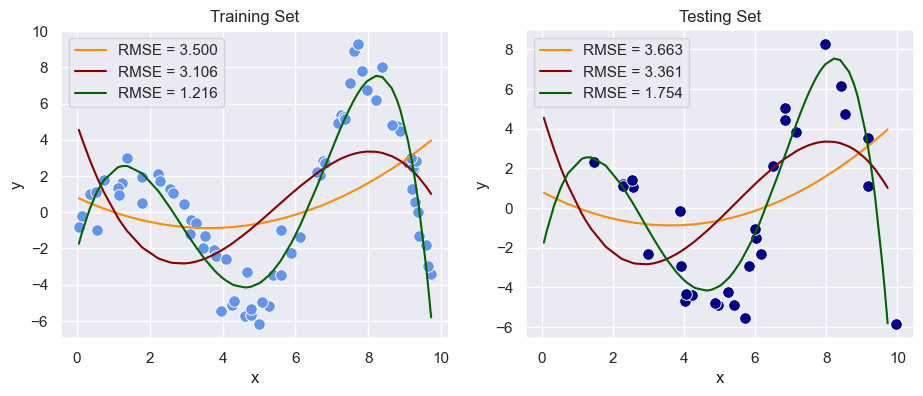

In [46]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
sns.lineplot(x=data_train.x, y=data_train.y_pred2, color='darkorange', 
             label=f'RMSE = {d2_rmse_train:.3f}')
sns.lineplot(x=data_train.x, y=data_train.y_pred3, color='darkred', 
             label=f'RMSE = {d3_rmse_train:.3f}')
sns.lineplot(x=data_train.x, y=data_train.y_pred5, color='darkgreen', 
             label=f'RMSE = {d5_rmse_train:.3f}').set_ylabel('y')
sns.scatterplot(x=x_train, y=y_train, s=70, color='cornflowerblue').set_title('Training Set');

plt.subplot(122)
sns.lineplot(x=data_train.x, y=data_train.y_pred2, color='darkorange', 
             label=f'RMSE = {d2_rmse_test:.3f}')
sns.lineplot(x=data_train.x, y=data_train.y_pred3, color='darkred', 
             label=f'RMSE = {d3_rmse_test:.3f}')
sns.lineplot(x=data_train.x, y=data_train.y_pred5, color='darkgreen', 
             label=f'RMSE = {d5_rmse_test:.3f}').set_ylabel('y')
sns.scatterplot(x=x_test, y=y_test, s=70, color='darkblue').set_title('Testing Set');

## Conclusions

Key Takeaways:
- Polynomial regression enables the modeling of non-linear data relationships, which simple linear regression cannot adequately capture.
- The quadratic and cubic models demonstrated limited success, with relatively low R² values, indicating a poor fit to the data's non-linear nature.
- A fifth-degree polynomial model significantly improved fit, achieving higher R² values and lower RMSE, suggesting better alignment with the underlying data structure.
- Although higher-degree polynomials improve model fit, they also increase the complexity and risk of overfitting, as evidenced by the significant differences in performance metrics between the training and testing datasets.

## References

- https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
- https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc, chapter 5